# Kanerva's Table 7.3 (page 70)

In [ ]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [ ]:
bits = 1000
sample = 1000000
radius = 451
scanner_type = sdmlib.SDM_SCANNER_OPENCL

In [3]:
def calculate_weights():
    from math import factorial, log
    comb = lambda a, b: factorial(a)/factorial(b)/factorial(a-b)
    def fn(d):
        r = comb(1000, d)
        for _ in xrange(1000):
            r /= 2.0
        return r

    d = range(1001)
    p = [fn(x) for x in d]
    I = [-log(x)/log(2) for x in p]
    weight = [int(x) for x in I]
    return weight

weight = calculate_weights()

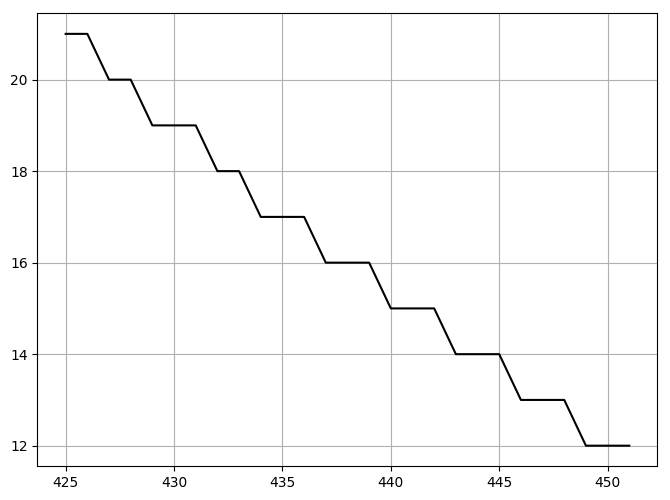

In [4]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(range(425, radius+1), weight[425:radius+1], 'k')
#plt.plot(range(0, radius+1), weight[0:radius+1], 'k')
plt.grid()
plt.show()

In [5]:
address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

In [6]:
for i in range(10000):
    clear_output(wait=True)
    print i
    bs = sdmlib.Bitstring.init_random(1000)
    sdm.write(bs, bs, weight=weight)

9999


In [7]:
b = sdmlib.Bitstring.init_random(1000)
sdm.write(b, b, weight=weight)

In [15]:
from IPython.display import clear_output

distances = []
x = range(0, 1001)
for i, dist in enumerate(x):
    clear_output(wait=True)
    print 'Distance: {:4d} ({:.2f}%)'.format(dist, 100.*(i+1)/len(x))
    c = sdmlib.Bitstring.init_from_bitstring(b)
    c.flip_random_bits(dist)
    assert c.distance_to(b) == dist
    d = sdm.iter_read(c, max_iter=1)
    distances.append(d.distance_to(b))
print 'Done!'

Distance: 1000 (100.00%)
Done!


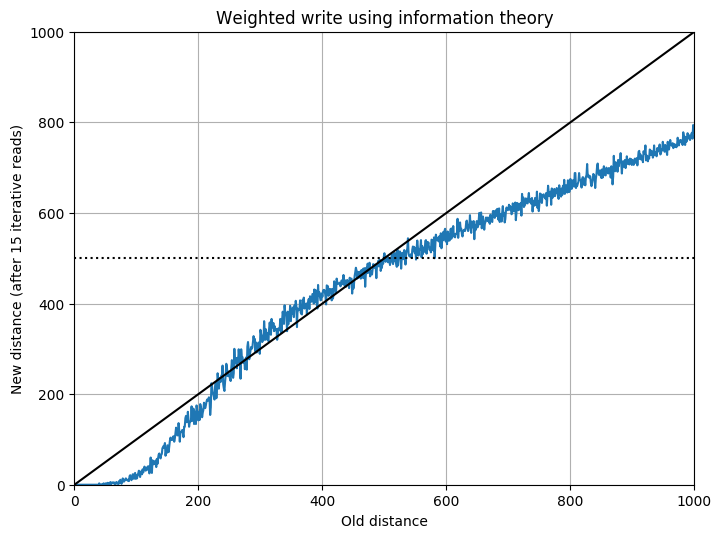

In [16]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(x, distances)
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Weighted write using information theory')
plt.ylabel('New distance (after 15 iterative reads)')
plt.xlabel('Old distance')
plt.grid()
plt.axis([0, 1000, 0, 1000]);

In [ ]:
c = sdmlib.Bitstring.init_from_bitstring(b)
c.flip_random_bits(1000)
d = c
print 0, b.distance_to(d)
for i in xrange(10):
    d = sdm.read(d)
    print i+1, b.distance_to(d)